In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
path = "/Users/younghyunkim/Desktop/dataproject/my_closet/raw_data"

In [3]:
df = pd.read_csv(f"{path}/closet_data_v3.csv")
df.head()

,제품명,계절,구매 년도,카테고리,구매처,브랜드 여부,구매 전 착용 여부,색상,가격,유행 여부,구매 목적,최근 1년 내 착용 여부,착용 빈도,만족도,주변 평가,성공점수,색상그룹,가격_bin,가격_q_bin,성공여부
0,배색 가디건 네이비,봄가을,2021,상의,1,0,1,네이비,3,0,일상,1,5,5,3,4.333333,블루 계열,1-4,매우 낮은 가격,1
1,배색 가디건 하늘,봄가을,2021,상의,0,0,1,스카이블루,3,0,일상,1,3,4,4,3.666667,블루 계열,1-4,매우 낮은 가격,1
2,줄무늬 티셔츠,봄가을,2014,상의,0,0,0,네이비,1,0,일상,1,4,5,4,4.333333,블루 계열,1-4,매우 낮은 가격,1
3,파란색 크롭 셔츠,봄가을,2023,상의,1,1,0,스카이블루,4,1,일상,1,4,4,4,4.000000,블루 계열,1-4,낮은 가격,1
4,숏 트렌치 코트,봄가을,2023,겉옷,0,1,1,베이지,16,1,일상,1,3,4,3,3.333333,브라운 계열,12-16,높은 가격,1


In [4]:
df.shape

(150, 20)

In [5]:
df.describe()

,구매 년도,구매처,브랜드 여부,구매 전 착용 여부,가격,유행 여부,최근 1년 내 착용 여부,착용 빈도,만족도,주변 평가,성공점수,성공여부
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2020.786667,0.233333,0.460000,0.426667,4.980000,0.186667,0.700000,2.646667,3.500000,3.506667,3.217778,0.533333
std,1.770704,0.424370,0.500067,0.496250,3.551103,0.390949,0.459793,1.351791,1.133682,0.917735,0.947532,0.500559
min,2014.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2020.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,3.000000,3.000000,2.666667,0.000000
50%,2021.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,3.000000,3.000000,3.000000,3.333333,1.000000
75%,2022.000000,0.000000,1.000000,1.000000,5.000000,0.000000,1.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,2023.000000,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [6]:
df.describe(include="object")

,제품명,계절,카테고리,색상,구매 목적,색상그룹,가격_bin,가격_q_bin
count,150,150,150,150,150,150,150,150
unique,150,3,4,18,3,7,5,4
top,배색 가디건 네이비,봄가을,상의,블랙,일상,블루 계열,1-4,매우 낮은 가격
freq,1,64,83,30,82,35,94,57


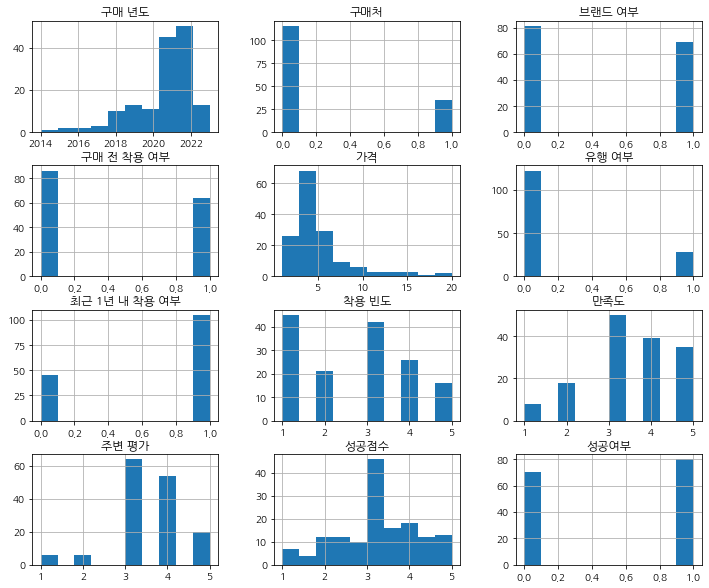

In [8]:
df.hist(bins=10, figsize=(12,10));

In [10]:
df.nunique()

제품명              150
계절                 3
구매 년도             10
카테고리               4
구매처                2
브랜드 여부             2
구매 전 착용 여부         2
색상                18
가격                18
유행 여부              2
구매 목적              3
최근 1년 내 착용 여부      2
착용 빈도              5
만족도                5
주변 평가              5
성공점수              13
색상그룹               7
가격_bin             5
가격_q_bin           4
성공여부               2
dtype: int64

# 데이터 전처리
- 라벨 인코딩
- 색상 컬럼 삭제

In [12]:
df.columns

Index(['제품명', '계절', '구매 년도', '카테고리', '구매처', '브랜드 여부', '구매 전 착용 여부', '색상', '가격',
       '유행 여부', '구매 목적', '최근 1년 내 착용 여부', '착용 빈도', '만족도', '주변 평가', '성공점수',
       '색상그룹', '가격_bin', '가격_q_bin', '성공여부'],
      dtype='object')

In [13]:
# 라벨인코딩 
df_label = df[['계절','카테고리','구매 목적','색상그룹']]
labels = df_label.columns
labels

Index(['계절', '카테고리', '구매 목적', '색상그룹'], dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
la

LabelEncoder()

In [15]:
label_encoded = df_label.copy()
for col in labels:
    la.fit(df_label[col])
    label_encoded[col] = la.transform(df_label[col])
    print(la.classes_)
label_encoded

['겨울' '봄가을' '여름']
['겉옷' '상의' '원피스' '하의']
['일상' '출근' '행사']
['그레이 계열' '그린 계열' '브라운 계열' '블랙 계열' '블루 계열' '핑크 계열' '화이트 계열']


,계절,카테고리,구매 목적,색상그룹
0,1,1,0,4
1,1,1,0,4
2,1,1,0,4
3,1,1,0,4
4,1,0,0,2
...,...,...,...,...
145,2,3,1,3
146,1,1,1,2
147,1,2,0,2
148,2,3,0,4


In [16]:
#수치형과 연결 concat
# 구매 년도	구매 전 착용 여부	가격	최근 1년 내 착용 여부	착용 빈도	만족도	주변 평가	성공점수
df_num = df[['구매 년도', '구매처', '구매 전 착용 여부', '브랜드 여부', '가격', '유행 여부', '최근 1년 내 착용 여부', '착용 빈도', '만족도', '주변 평가', '성공점수', '성공여부']]
df_num

,구매 년도,구매처,구매 전 착용 여부,브랜드 여부,가격,유행 여부,최근 1년 내 착용 여부,착용 빈도,만족도,주변 평가,성공점수,성공여부
0,2021,1,1,0,3,0,1,5,5,3,4.333333,1
1,2021,0,1,0,3,0,1,3,4,4,3.666667,1
2,2014,0,0,0,1,0,1,4,5,4,4.333333,1
3,2023,1,0,1,4,1,1,4,4,4,4.000000,1
4,2023,0,1,1,16,1,1,3,4,3,3.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...
145,2021,1,0,0,2,0,1,4,4,4,4.000000,1
146,2019,0,0,1,8,0,1,4,5,5,4.666667,1
147,2020,0,1,0,5,1,0,1,1,1,1.000000,0
148,2019,1,0,0,3,0,0,1,3,3,2.333333,0


In [19]:
# 라벨 인코딩 데이터와 통합
df_labeled = pd.concat([df_num, label_encoded], axis=1)

# 컬럼 순서 수동 정렬
df_labeled = df_labeled[['계절', '구매 년도', '카테고리', '구매처', '브랜드 여부', '구매 전 착용 여부', '가격',
       '유행 여부', '구매 목적', '최근 1년 내 착용 여부', '착용 빈도', '만족도', '주변 평가', '색상그룹','성공점수',
       '성공여부']]
df_labeled

,계절,구매 년도,카테고리,구매처,브랜드 여부,구매 전 착용 여부,가격,유행 여부,구매 목적,최근 1년 내 착용 여부,착용 빈도,만족도,주변 평가,색상그룹,성공점수,성공여부
0,1,2021,1,1,0,1,3,0,0,1,5,5,3,4,4.333333,1
1,1,2021,1,0,0,1,3,0,0,1,3,4,4,4,3.666667,1
2,1,2014,1,0,0,0,1,0,0,1,4,5,4,4,4.333333,1
3,1,2023,1,1,1,0,4,1,0,1,4,4,4,4,4.000000,1
4,1,2023,0,0,1,1,16,1,0,1,3,4,3,2,3.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2,2021,3,1,0,0,2,0,1,1,4,4,4,3,4.000000,1
146,1,2019,1,0,1,0,8,0,1,1,4,5,5,2,4.666667,1
147,1,2020,2,0,0,1,5,1,0,0,1,1,1,2,1.000000,0
148,2,2019,3,1,0,0,3,0,0,0,1,3,3,4,2.333333,0


# 상관관계 분석

In [20]:
cor = df_labeled.corr()
cor

,계절,구매 년도,카테고리,구매처,브랜드 여부,구매 전 착용 여부,가격,유행 여부,구매 목적,최근 1년 내 착용 여부,착용 빈도,만족도,주변 평가,색상그룹,성공점수,성공여부
계절,1.000000,0.119736,0.128744,-0.062450,-0.017666,-0.017802,-0.191551,0.045193,0.190837,-0.019213,-0.169911,-0.015585,-0.009626,0.047180,-0.090124,-0.158835
구매 년도,0.119736,1.000000,0.081279,0.129209,-0.146132,-0.147766,-0.111687,0.242116,0.104484,0.242356,0.136530,-0.197255,-0.081719,0.071309,-0.040126,-0.007067
카테고리,0.128744,0.081279,1.000000,0.238715,-0.135519,0.039420,-0.318915,0.117945,0.043502,0.053182,-0.041863,0.015407,-0.021316,-0.032089,-0.020645,-0.041872
구매처,-0.062450,0.129209,0.238715,1.000000,-0.351046,-0.348435,-0.286363,0.059331,-0.093115,-0.085990,-0.007410,-0.062776,-0.012637,0.148094,-0.032640,0.010532
브랜드 여부,-0.017666,-0.146132,-0.135519,-0.351046,1.000000,0.474908,0.485199,-0.133198,0.142917,-0.125514,-0.085582,0.065111,0.073705,-0.175755,0.009065,-0.075074
구매 전 착용 여부,-0.017802,-0.147766,0.039420,-0.348435,0.474908,1.000000,0.469508,0.001845,0.165212,0.035297,-0.003868,0.083506,0.023186,-0.176626,0.038950,0.050434
가격,-0.191551,-0.111687,-0.318915,-0.286363,0.485199,0.469508,1.000000,-0.050470,0.167970,-0.110571,-0.079776,0.042511,0.058733,-0.080508,-0.002021,-0.035491
유행 여부,0.045193,0.242116,0.117945,0.059331,-0.133198,0.001845,-0.050470,1.000000,0.019488,0.014935,-0.102950,-0.075713,-0.078315,-0.161120,-0.104438,-0.032009
구매 목적,0.190837,0.104484,0.043502,-0.093115,0.142917,0.165212,0.167970,0.019488,1.000000,-0.072339,-0.269562,-0.124126,-0.075706,0.136220,-0.202135,-0.268061
최근 1년 내 착용 여부,-0.019213,0.242356,0.053182,-0.085990,-0.125514,0.035297,-0.110571,0.014935,-0.072339,1.000000,0.584170,0.392699,0.283109,0.012473,0.525819,0.524891


<AxesSubplot:>

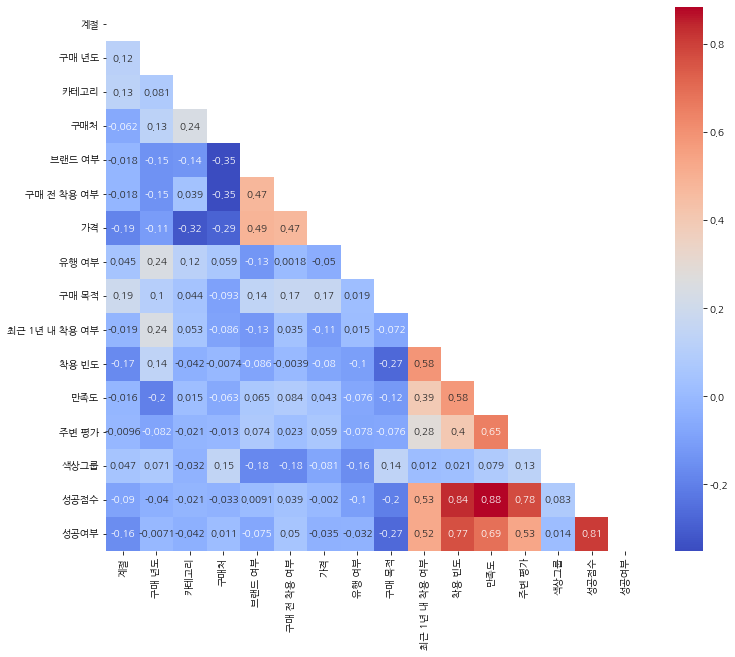

In [21]:
# 전체 상관관계 시각화
mask = np.triu(np.ones_like(cor))
plt.figure(figsize=(12,10)) #그래프 사이즈 조절
sns.heatmap(cor, cmap="coolwarm", annot = True, mask=mask)

<AxesSubplot:xlabel='성공여부', ylabel='count'>

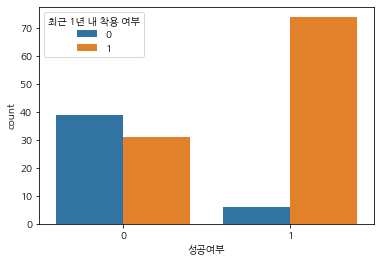

In [28]:
sns.countplot(data=df, x='성공여부',hue='최근 1년 내 착용 여부')

<AxesSubplot:xlabel='성공여부', ylabel='count'>

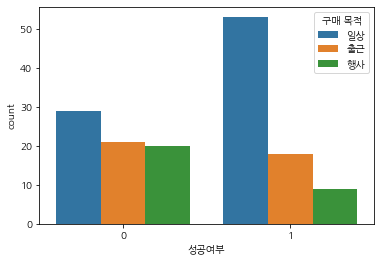

In [26]:
sns.countplot(data=df, x='성공여부',hue='구매 목적')